## **READ** **DATA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:

#df1=pd.read_csv('golf1.csv')
#df2=pd.read_csv('golf2.csv')
#df3=pd.read_csv('golf3.csv')
#df4=pd.read_csv('golf4.csv')

#cars=[df1,df2,df3,df4]
#df=pd.concat(cars,ignore_index=True)
#df.to_csv("golf_cars.csv",encoding="utf-8")

df=pd.read_csv('test_cars.csv')
df.head()

,Unnamed: 0,price_try,brand,series,model,year,km,gear_type,fuel,body_type,...,torque_nm,engSize_cc,engPower_hp,max_power_rpm,min_power_rpm,acceleration_100_sec,max_speed_kmh,avg_fuel_lt,painted,changed
0,0,1380000,Volkswagen,Golf,1.4 TSi Highline,2017,27500,Yarı Otomatik,Benzin,Hatchback/5,...,200.0,1395,125,5000.0,1400.0,"9,1",204.0,"5,3",0,0
1,1,1080000,Volkswagen,Golf,1.6 TDi BlueMotion Comfortline,2016,102000,Yarı Otomatik,Dizel,Hatchback/5,...,250.0,1598,110,3200.0,1500.0,"10,5",195.0,"3,9",0,0
2,2,675000,Volkswagen,Golf,1.6 TDi BlueMotion Comfortline,2015,137000,Düz,Dizel,Hatchback/5,...,250.0,1598,110,3200.0,1500.0,"10,5",195.0,"3,8",2,1
3,3,1133000,Volkswagen,Golf,1.6 TDi BlueMotion Comfortline,2018,88000,Yarı Otomatik,Dizel,Hatchback/5,...,250.0,1598,115,4000.0,1500.0,"10,5",198.0,"4,2",0,0
4,4,610000,Volkswagen,Golf,1.6 TDi Trendline,2012,270000,Düz,Dizel,Hatchback/5,...,230.0,1598,90,4200.0,1800.0,"12,9",178.0,"4,5",8,0


In [ ]:
df.drop("Unnamed: 0",axis=1,inplace=True)
#df.drop("Unnamed: 0.1",axis=1,inplace=True)

In [ ]:
df.shape

(50, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price_try             50 non-null     int64  
 1   brand                 50 non-null     object 
 2   series                50 non-null     object 
 3   model                 50 non-null     object 
 4   year                  50 non-null     int64  
 5   km                    50 non-null     int64  
 6   gear_type             50 non-null     object 
 7   fuel                  50 non-null     object 
 8   body_type             50 non-null     object 
 9   color                 50 non-null     object 
 10  from_                 50 non-null     object 
 11  wheel_drive           50 non-null     object 
 12  cylinder_number       49 non-null     float64
 13  torque_nm             49 non-null     float64
 14  engSize_cc            50 non-null     int64  
 15  engPower_hp           50 

In [ ]:
df.isnull().values.any()
df["brand"].unique()

df['engSize_cc'].unique()
df['engSize_cc'] = df['engSize_cc'].astype(str)
df["engSize_cc"]=df["engSize_cc"].str.replace(" cc", "")
df["engSize_cc"]=df["engSize_cc"].str.replace(" cm3", "")
df["engSize_cc"]=df["engSize_cc"].str.replace(" -", "")
df["engSize_cc"]=df["engSize_cc"].str.replace("-", "")
df=df.dropna(subset=['engSize_cc'])
df=df.drop(df[(df['engSize_cc'] == '1201 1400')].index)
df=df.drop(df[(df['engSize_cc'] == '1401 1600')].index)
df=df.drop(df[(df['engSize_cc'] == '1601 1800')].index)
df=df.drop(df[(df['engSize_cc'] == '')].index)
df['engSize_cc'] = df['engSize_cc'].str.split(" ").str[0].astype(int)


In [ ]:
df[df['engSize_cc'].isna()]

,price_try,brand,series,model,year,km,gear_type,fuel,body_type,color,...,torque_nm,engSize_cc,engPower_hp,max_power_rpm,min_power_rpm,acceleration_100_sec,max_speed_kmh,avg_fuel_lt,painted,changed


In [ ]:
df['engSize_cc'].unique()

array([1395, 1598, 1197, 1595, 1498, 1390])

In [ ]:
df = df.drop('brand', axis=1)
df = df.drop('series', axis=1)
df = df.drop('model', axis=1)
df = df.drop('cylinder_number', axis=1)
df = df.drop('acceleration_100_sec', axis=1)
df = df.drop('max_speed_kmh', axis=1)
df = df.drop('max_power_rpm', axis=1)
df = df.drop('min_power_rpm', axis=1)
df = df.drop('torque_nm', axis=1)

In [ ]:
df['engPower_hp'].unique()
df['engPower_hp'] = df['engPower_hp'].astype(str)
df=df.dropna(subset=['engPower_hp'])
df=df.drop(df[(df['engPower_hp'] == 'nan')].index)
df=df.drop(df[(df['engPower_hp'] == '126 - 150 HP')].index)
df=df.drop(df[(df['engPower_hp'] == '101 - 125 HP')].index)
df=df.drop(df[(df['engPower_hp'] == '')].index)
df['engPower_hp'] = df['engPower_hp'].str.split(" ").str[0].astype(int)

In [ ]:
df['engPower_hp'].unique()

array([125, 110, 115,  90, 105, 101, 122, 150, 102])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   price_try    50 non-null     int64 
 1   year         50 non-null     int64 
 2   km           50 non-null     int64 
 3   gear_type    50 non-null     object
 4   fuel         50 non-null     object
 5   body_type    50 non-null     object
 6   color        50 non-null     object
 7   from_        50 non-null     object
 8   wheel_drive  50 non-null     object
 9   engSize_cc   50 non-null     int32 
 10  engPower_hp  50 non-null     int32 
 11  avg_fuel_lt  49 non-null     object
 12  painted      50 non-null     int64 
 13  changed      50 non-null     int64 
dtypes: int32(2), int64(5), object(7)
memory usage: 5.2+ KB


In [ ]:
df['avg_fuel_lt'].unique()


array(['5,3', '3,9', '3,8', '4,2', '4,5', '4,9', '6,8', '7,6', '4,8',
       '8,6', '5', '6,2', '6,7', nan], dtype=object)

In [ ]:
# 'numbers' sütununu stringe dönüştürme
df['avg_fuel_lt'] = df['avg_fuel_lt'].astype(str)

# ',' karakterini '.' ile değiştirelim ve float tipine dönüştürelim
df['avg_fuel_lt'] = df['avg_fuel_lt'].str.replace(',', '.').astype(float)

# NaN değerlerini 0 ile dolduralım
df['avg_fuel_lt'].fillna(0, inplace=True)
#df['avg_fuel_lt'] = df['avg_fuel_lt'].fillna(0).astype(float)

In [ ]:
df

,price_try,year,km,gear_type,fuel,body_type,color,from_,wheel_drive,engSize_cc,engPower_hp,avg_fuel_lt,painted,changed
0,1380000,2017,27500,Yarı Otomatik,Benzin,Hatchback/5,Beyaz,Sahibinden,Önden Çekiş,1395,125,5.3,0,0
1,1080000,2016,102000,Yarı Otomatik,Dizel,Hatchback/5,Beyaz,Sahibinden,Önden Çekiş,1598,110,3.9,0,0
2,675000,2015,137000,Düz,Dizel,Hatchback/5,Gri (metalik),Sahibinden,Önden Çekiş,1598,110,3.8,2,1
3,1133000,2018,88000,Yarı Otomatik,Dizel,Hatchback/5,Beyaz,Sahibinden,Önden Çekiş,1598,115,4.2,0,0
4,610000,2012,270000,Düz,Dizel,Hatchback/5,Siyah,Sahibinden,Önden Çekiş,1598,90,4.5,8,0
5,1220000,2017,90000,Yarı Otomatik,Dizel,Hatchback/5,Beyaz,Sahibinden,Önden Çekiş,1598,115,4.2,0,0
6,1065000,2017,120735,Yarı Otomatik,Dizel,Hatchback/5,Siyah,Sahibinden,Önden Çekiş,1598,115,4.2,0,0
7,875000,2017,154000,Yarı Otomatik,Dizel,Hatchback/5,Beyaz,Sahibinden,Önden Çekiş,1598,115,4.2,0,0
8,735000,2015,116750,Düz,Benzin,Hatchback/5,Siyah,Sahibinden,Önden Çekiş,1197,105,4.9,0,2
9,730000,2014,236000,Düz,Dizel,Hatchback/5,Beyaz,Galeriden,Önden Çekiş,1598,90,3.8,0,0


In [ ]:
df=df.dropna(subset=['wheel_drive'])
df=df.dropna(subset=['color'])

In [ ]:
df.shape

(50, 14)

In [ ]:
df.to_csv("test_cars_v1.csv",encoding="utf-8")

## **TO pd.Categorical()**

In [ ]:
df['gear_type'].unique()
df['fuel'].unique()
df['body_type'].unique()
df['color'].unique()
df=df.drop(df[(df['color'] == '-')].index)
df['from_'].unique()
df['wheel_drive'].unique()


array(['Önden Çekiş'], dtype=object)

In [ ]:
df['gear_type'] = pd.Categorical(df['gear_type'])
df['fuel'] = pd.Categorical(df['fuel'])
df['body_type'] = pd.Categorical(df['body_type'])
df['color'] = pd.Categorical(df['color'])
df['from_'] = pd.Categorical(df['from_'])
df['wheel_drive'] = pd.Categorical(df['wheel_drive'])

In [ ]:
df['fuel'].unique()

['Benzin', 'Dizel', 'LPG & Benzin', 'Hibrit']
Categories (4, object): ['Benzin', 'Dizel', 'Hibrit', 'LPG & Benzin']

In [ ]:
label_encoder = LabelEncoder()
df['gear_type'] = label_encoder.fit_transform(df['gear_type'])
df['fuel'] = label_encoder.fit_transform(df['fuel'])
df['body_type'] = label_encoder.fit_transform(df['body_type'])
df['color'] = label_encoder.fit_transform(df['color'])
df['from_'] = label_encoder.fit_transform(df['from_'])
df['wheel_drive'] = label_encoder.fit_transform(df['wheel_drive'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price_try    50 non-null     int64  
 1   year         50 non-null     int64  
 2   km           50 non-null     int64  
 3   gear_type    50 non-null     int32  
 4   fuel         50 non-null     int32  
 5   body_type    50 non-null     int32  
 6   color        50 non-null     int32  
 7   from_        50 non-null     int32  
 8   wheel_drive  50 non-null     int32  
 9   engSize_cc   50 non-null     int32  
 10  engPower_hp  50 non-null     int32  
 11  avg_fuel_lt  50 non-null     float64
 12  painted      50 non-null     int64  
 13  changed      50 non-null     int64  
dtypes: float64(1), int32(8), int64(5)
memory usage: 4.0 KB


In [ ]:
df.to_csv("test_cars_encoded.csv",encoding="utf-8")

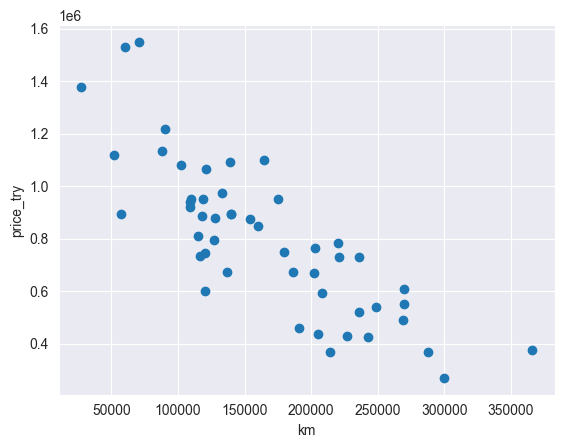

In [ ]:
x=df['km'].values
y=df['price_try'].values

plt.scatter(x,y)
plt.xlabel('km')
plt.ylabel('price_try')
plt.show()

In [ ]:
df['price_try'].max()

1550000

In [ ]:
df.corr()

,price_try,year,km,gear_type,fuel,body_type,color,from_,wheel_drive,engSize_cc,engPower_hp,avg_fuel_lt,painted,changed
price_try,1.000000,0.840380,-0.817258,0.730254,-0.481277,0.262336,-0.234928,-0.124085,NaN,-0.173166,0.579586,-0.490887,-0.310946,-0.213955
year,0.840380,1.000000,-0.767582,0.619938,-0.676690,0.327166,-0.329048,-0.137489,NaN,-0.228007,0.397273,-0.775566,-0.269472,-0.092434
km,-0.817258,-0.767582,1.000000,-0.602791,0.604330,-0.266141,0.348917,-0.020962,NaN,0.351900,-0.433185,0.527228,0.280080,0.085798
gear_type,0.730254,0.619938,-0.602791,1.000000,-0.340155,0.147224,-0.184247,-0.254814,NaN,-0.076972,0.556973,-0.332973,-0.181245,-0.173230
fuel,-0.481277,-0.676690,0.604330,-0.340155,1.000000,-0.255373,0.238483,0.018444,NaN,0.602594,-0.227718,0.592247,0.257338,-0.136541
body_type,0.262336,0.327166,-0.266141,0.147224,-0.255373,1.000000,-0.090351,-0.103406,NaN,-0.087702,0.117012,-0.249466,0.088603,0.069321
color,-0.234928,-0.329048,0.348917,-0.184247,0.238483,-0.090351,1.000000,-0.056221,NaN,-0.087814,0.107422,0.438103,0.260251,0.306897
from_,-0.124085,-0.137489,-0.020962,-0.254814,0.018444,-0.103406,-0.056221,1.000000,NaN,-0.047657,-0.114659,-0.051605,0.115719,0.145838
wheel_drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engSize_cc,-0.173166,-0.228007,0.351900,-0.076972,0.602594,-0.087702,-0.087814,-0.047657,NaN,1.000000,-0.159950,-0.022788,0.232108,-0.272327


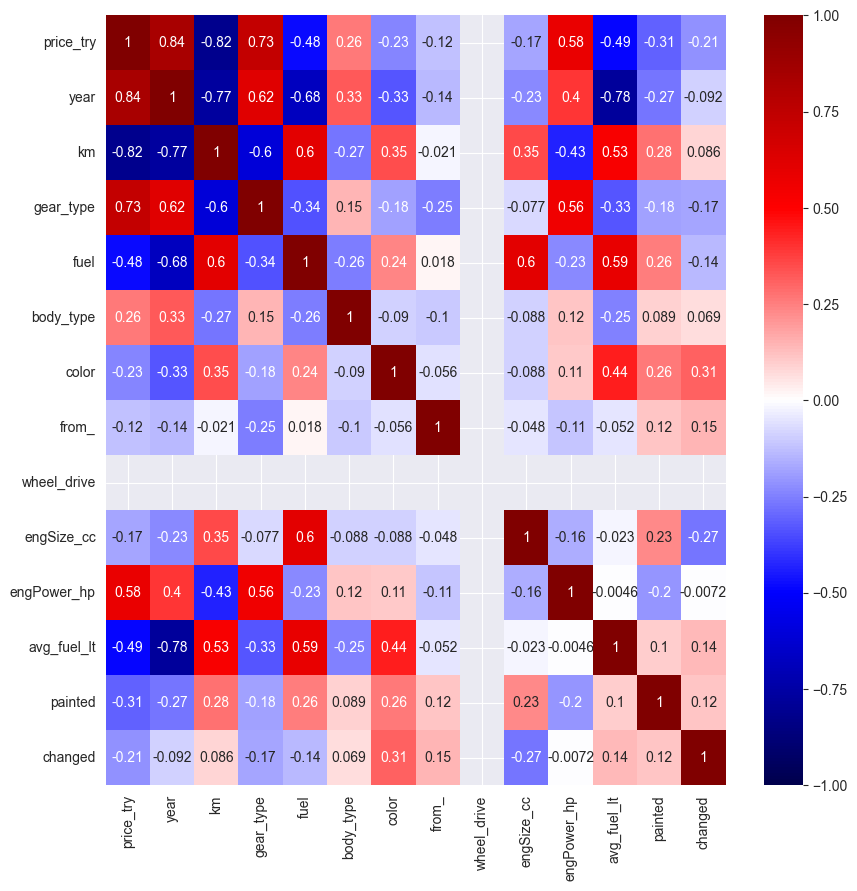

In [ ]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);